In [85]:
from delta_surface import *

In [86]:
test = delta_suface(['SPY', 'XLF', 'XLC', 'XLK'])

In [77]:
#test = delta_suface(['AAPL', 'TSLA'])

In [87]:
test.get_px()

[*********************100%***********************]  4 of 4 completed


In [88]:
test.spot

,SPY,XLC,XLF,XLK
2022-06-23,373.367340,54.450985,30.681170,127.852570
2022-06-24,385.238129,56.525780,31.812408,132.447784
2022-06-27,383.766632,55.989712,31.704199,131.554535
2022-06-28,375.925171,54.361641,31.389423,127.614365
2022-06-29,375.619019,54.530403,31.212358,127.872406
...,...,...,...,...
2023-06-05,427.100006,63.320000,32.630001,165.940002
2023-06-06,428.029999,63.580002,33.040001,165.899994
2023-06-07,426.549988,62.869999,33.169998,163.419998
2023-06-08,429.130005,63.189999,33.139999,165.190002


In [89]:
test.poly_chain()

In [90]:
test.poly_parse()

In [91]:
test.iv_calcs()

In [92]:
test.delta_df

,expiry,strike,callput,style,spot,volume,update,open_interest,px,ticker,k_norm,t_exp,t_exp_update,px_update,pv_vol,pv_delta
0,2023-12-15,150,call,american,279.82,1.0,2023-06-08,136,429.899994,SPY,0.348918,134,136,429.130005,NaN,1.000000
1,2023-12-15,155,call,american,232.80,11.0,2023-03-15,11,429.899994,SPY,0.360549,134,197,387.799957,NaN,1.000000
2,2023-12-15,160,call,american,305.92,10.0,2021-12-16,0,429.899994,SPY,0.372180,134,521,429.899994,0.956778,0.933016
3,2023-12-15,165,call,american,250.99,2.0,2023-04-18,1,429.899994,SPY,0.383810,134,173,414.209991,0.956778,0.961022
4,2023-12-15,170,call,american,259.21,1.0,2023-06-07,58,429.899994,SPY,0.395441,134,137,426.549988,0.956778,0.970920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2023-12-15,215,call,american,NaN,NaN,NaT,0,166.009995,XLK,1.295103,134,134,166.009995,0.223016,0.043608
452,2023-12-15,220,call,american,NaN,NaN,NaT,0,166.009995,XLK,1.325221,134,134,166.009995,0.223016,0.030026
453,2023-12-15,225,call,american,NaN,NaN,NaT,0,166.009995,XLK,1.355340,134,134,166.009995,0.223016,0.020343
454,2023-12-15,230,call,american,NaN,NaN,NaT,0,166.009995,XLK,1.385459,134,134,166.009995,0.223016,0.013575


In [93]:
var = test.delta_df

In [94]:
test.delta_curve(sf = 0.05)

In [95]:
test.curve_df

,SPY,XLF,XLC,XLK
0.50,0.963570,0.987730,0.992517,0.996073
0.51,0.974330,0.979438,0.991355,0.997045
0.52,0.982578,0.972237,0.991215,0.998454
0.53,0.987874,0.966047,0.991941,1.000000
0.54,0.990671,0.960784,0.993371,1.000000
...,...,...,...,...
1.46,0.002261,0.017762,0.002017,0.000000
1.47,0.002044,0.018973,0.001606,0.000000
1.48,0.001817,0.020011,0.001182,0.000000
1.49,0.001586,0.020828,0.000720,0.000000


When we reach max or min for first time outwith 50d, maybe we stick to 0/1 from there

<AxesSubplot: >

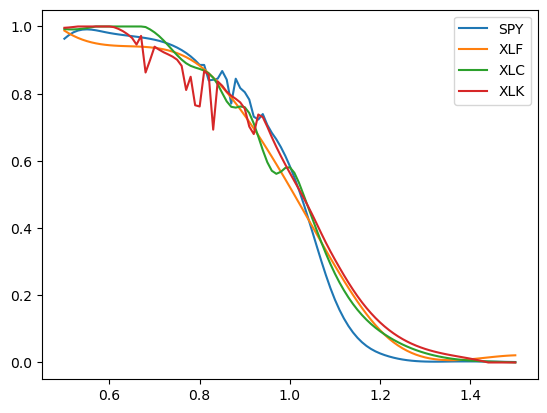

In [96]:
test.curve_df.plot()

In [136]:
vol_df = test.delta_df[test.delta_df['ticker'] == 'SPY'].sort_values('strike')

In [158]:
x = test.curve_df.index
y = test.curve_df['XLF']

x_init = vol_df['k_norm']
y_init = vol_df['pv_delta']

x_new = np.arange(0.5,1.501,0.01)

In [159]:
from scipy import interpolate

In [160]:
spl = interpolate.UnivariateSpline(x, y)
spl.set_smoothing_factor(0.02)

In [161]:
y_new = spl(x_new)

In [162]:
import matplotlib.pyplot as plt

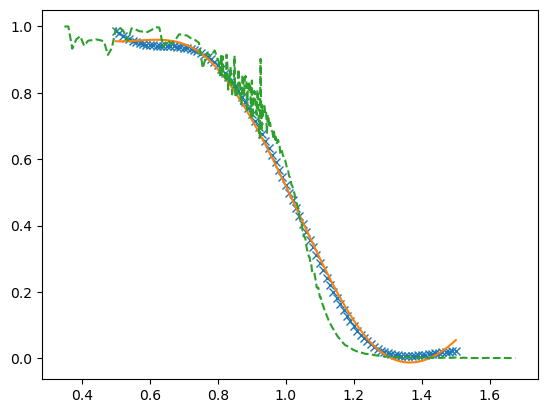

In [163]:
plt.plot(x, y, 'x', x_new, y_new, '-', x_init, y_init, '--')

In [ ]:
print(1)